Dataset source: https://archive.ics.uci.edu/dataset/242/energy+efficiency  

This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters. The simulated buildings were generated using Ecotect.  

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:  
* `X1`	Relative Compactness  

* `X2`	Surface Area  

* `X3`	Wall Area  

* `X4`	Roof Area  

* `X5`	Overall Height  

* `X6`	Orientation  

* `X7`	Glazing Area. Three types of glazing areas, which are expressed as percentages of the floor area: 10%, 25%, and 40%.  

* `X8`	Glazing Area Distribution. (1) uniform: with 25% glazing on each side, (2) north: 55% on the north side and 15% on each of the other sides, (3) east: 55% on the east side and 15% on each of the other sides, (4) south: 55% on the south side and 15% on each of the other sides, and (5) west: 55% on the west side and 15% on each of the other sides.    

* `y1`	Heating Load  

* `y2`	Cooling Load  

All the buildings have the same volume but different surface areas and dimensions. The materials used for each of the 18 elements are the same for all building forms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
# load data
data = pd.read_excel('https://github.com/JielingChen/building_energy_efficiency_prediction/raw/main/ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# rename columns to more informative names
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 
                'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [4]:
# check data type and whether there is missing value and 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


* There is no missing data.  
* As known from the dataset description, `orientation` and `glazing_area_distribution` should be categorical variables.

In [5]:
# check the distribution of these two variables to confirm
print(data['orientation'].value_counts())
print(data['glazing_area_distribution'].value_counts())

orientation
2    192
3    192
4    192
5    192
Name: count, dtype: int64
glazing_area_distribution
1    144
2    144
3    144
4    144
5    144
0     48
Name: count, dtype: int64


In [6]:
# change the data type to category
data['orientation'] = data['orientation'].astype('category')
data['glazing_area_distribution'] = data['glazing_area_distribution'].astype('category')

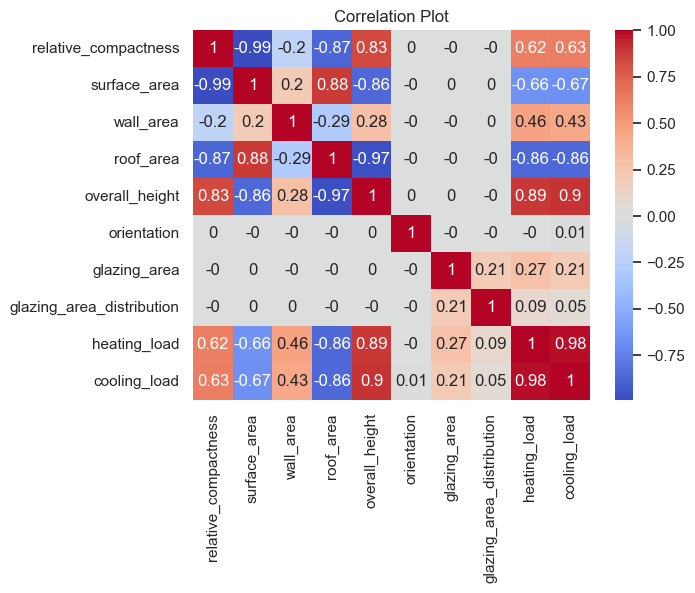

In [7]:
# check correlation between variables
corr = data.corr().round(2)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Plot')
plt.show()

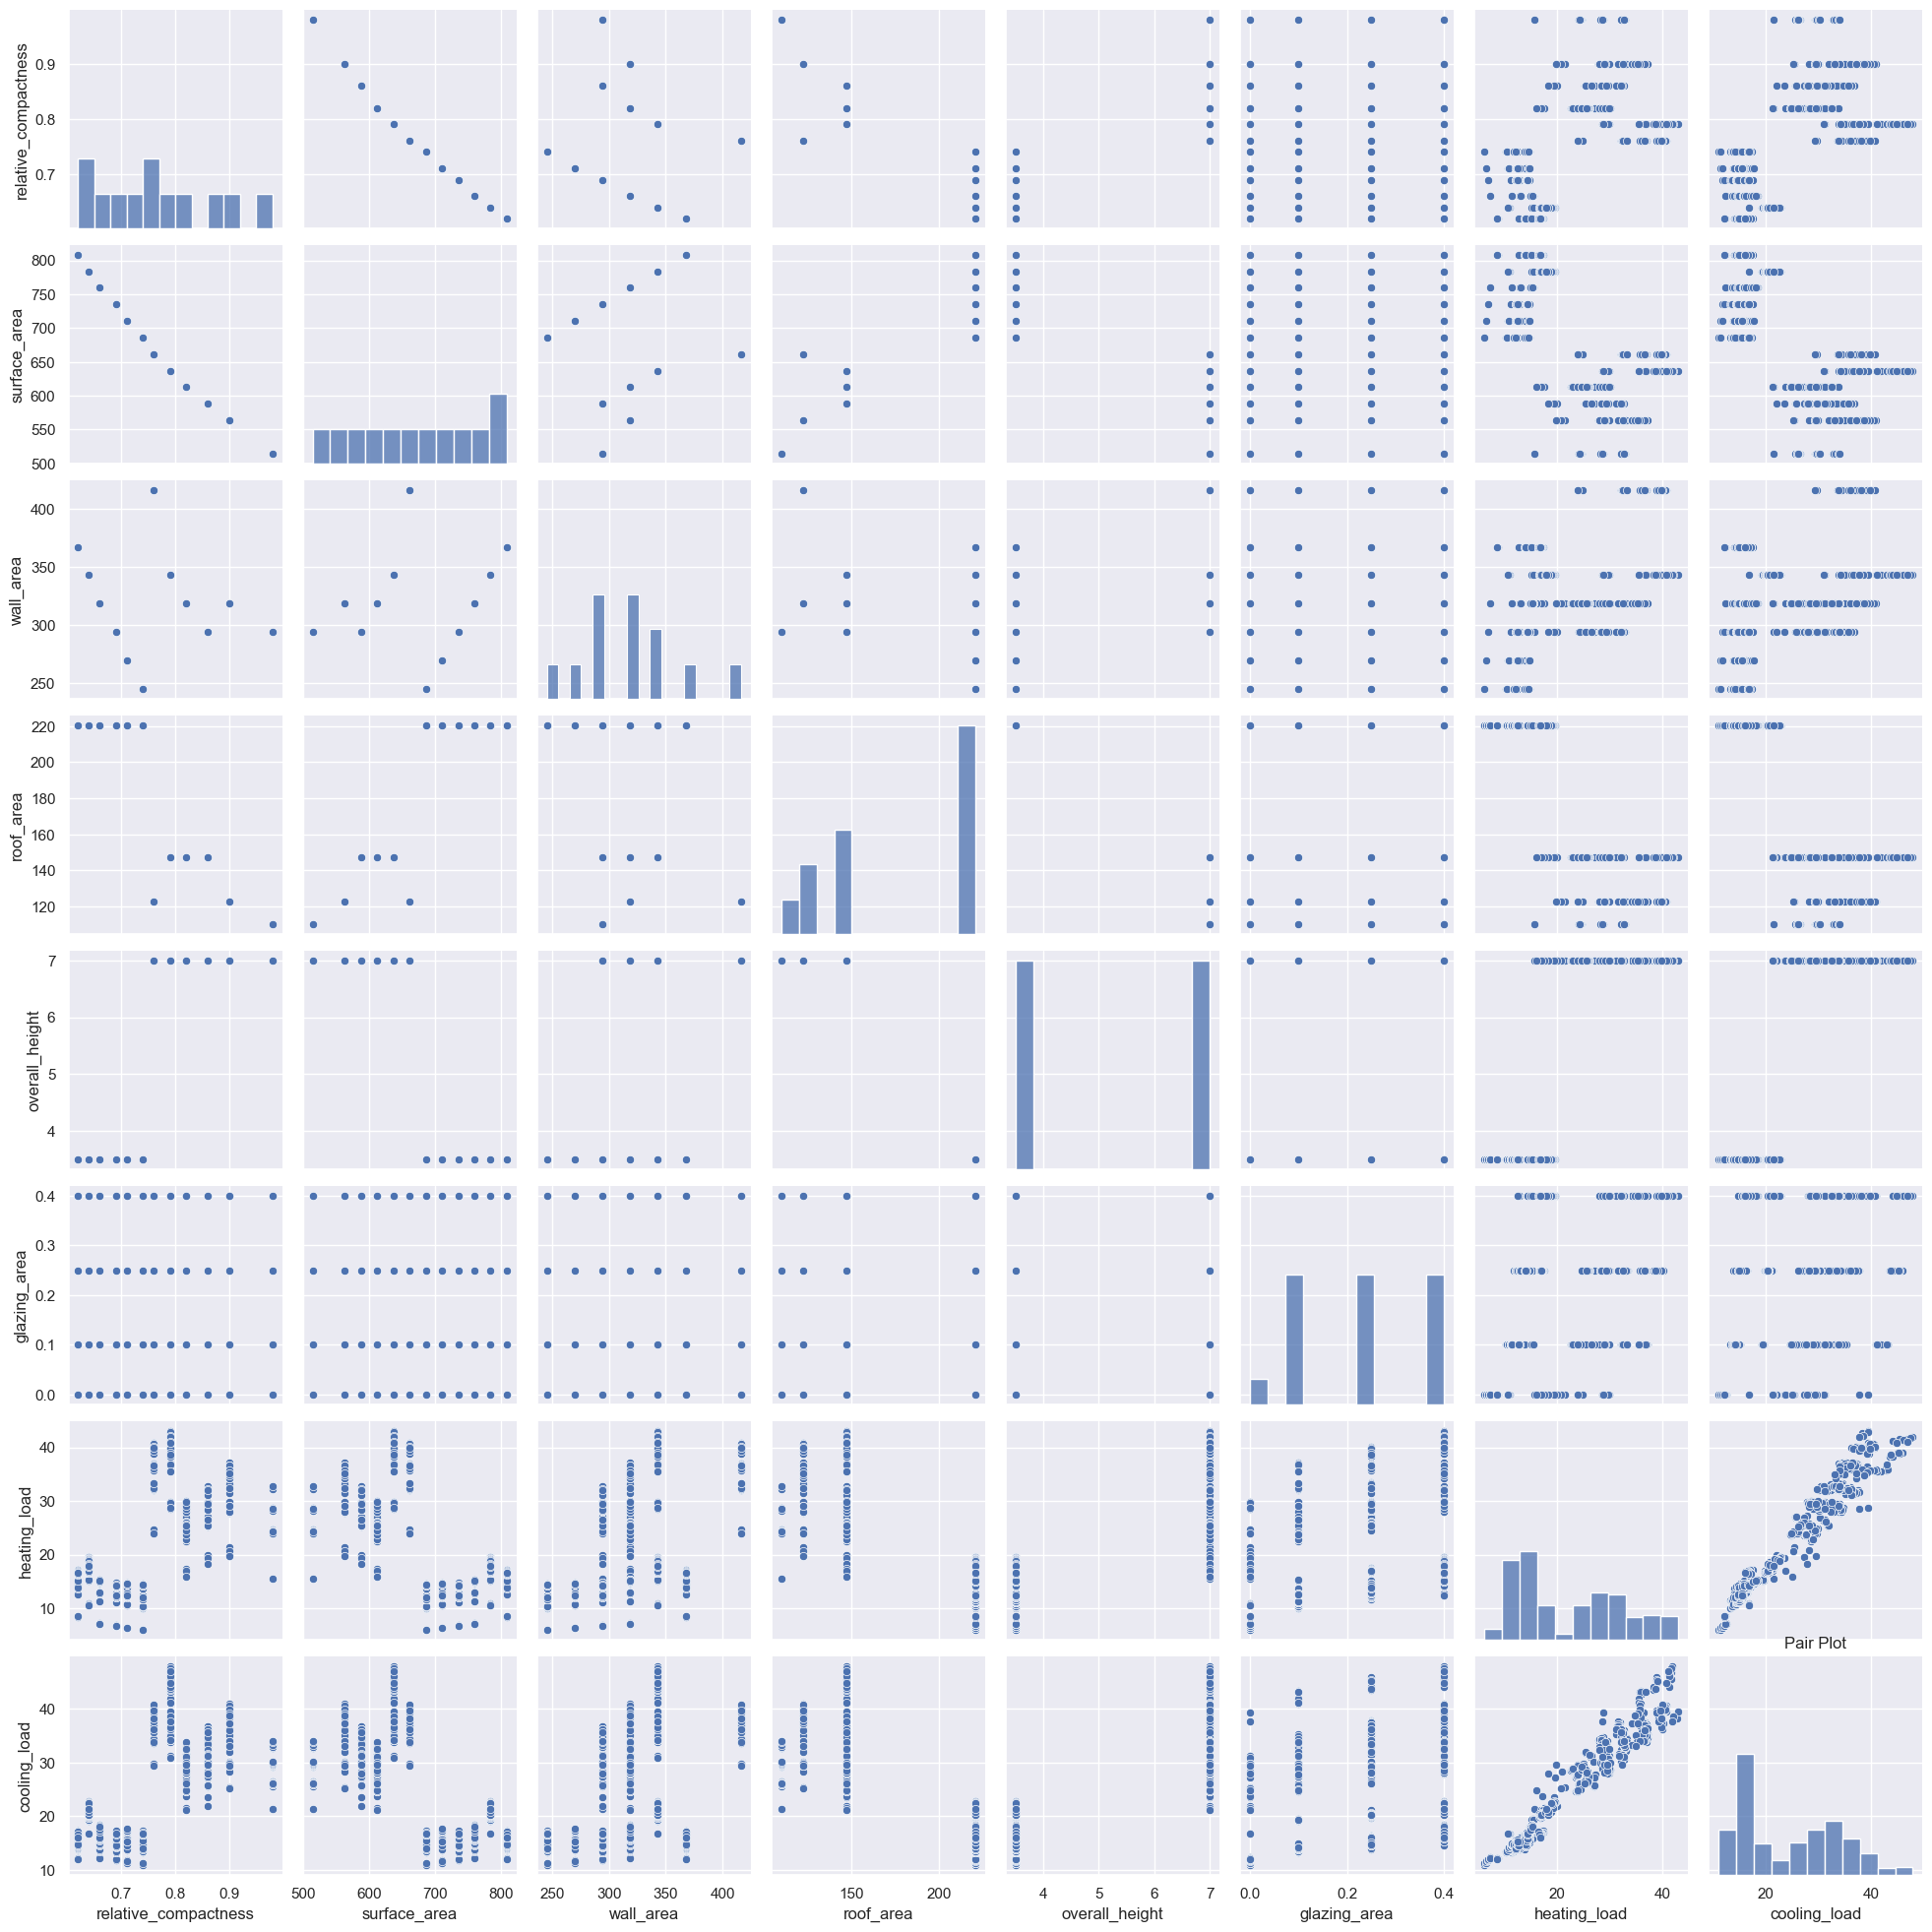

In [8]:
# check the distribution and relationship between variables
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()

* The `relative_compactness` and `surface_area` are highly correlated, and `surface_area` has higher correlation with other variables than `relative_compactness`, so I dropped `surface_area` to avoid collinearity.
* The `orientation` has almost no correlation with `heating_load` and `cooling_load`, so I should consider dropping `orientation` to reduce dimensionality.

In [9]:
# drop surface_area
data.drop(['surface_area'], axis=1, inplace=True)

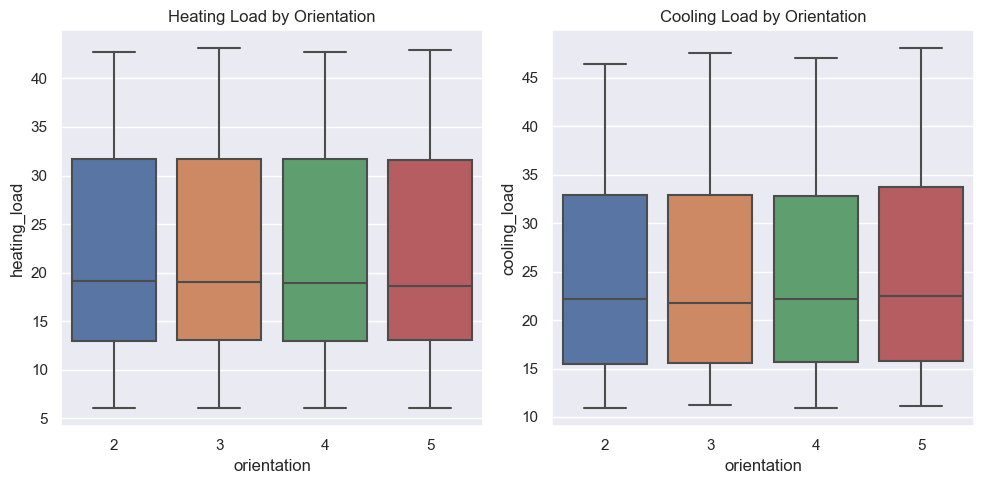

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether orientation has an impact on heating_load
sns.boxplot(data=data, x='orientation', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Orientation')

# check whether orientation has an impact on cooling_load
sns.boxplot(data=data, x='orientation', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Orientation')

plt.tight_layout()
plt.show()

* Orientation has no impact on the heating load and cooling load, so I can drop this feature to reduce dimensionality.

In [11]:
# drop orientation to reduce dimensionality
data = data.drop('orientation', axis=1)

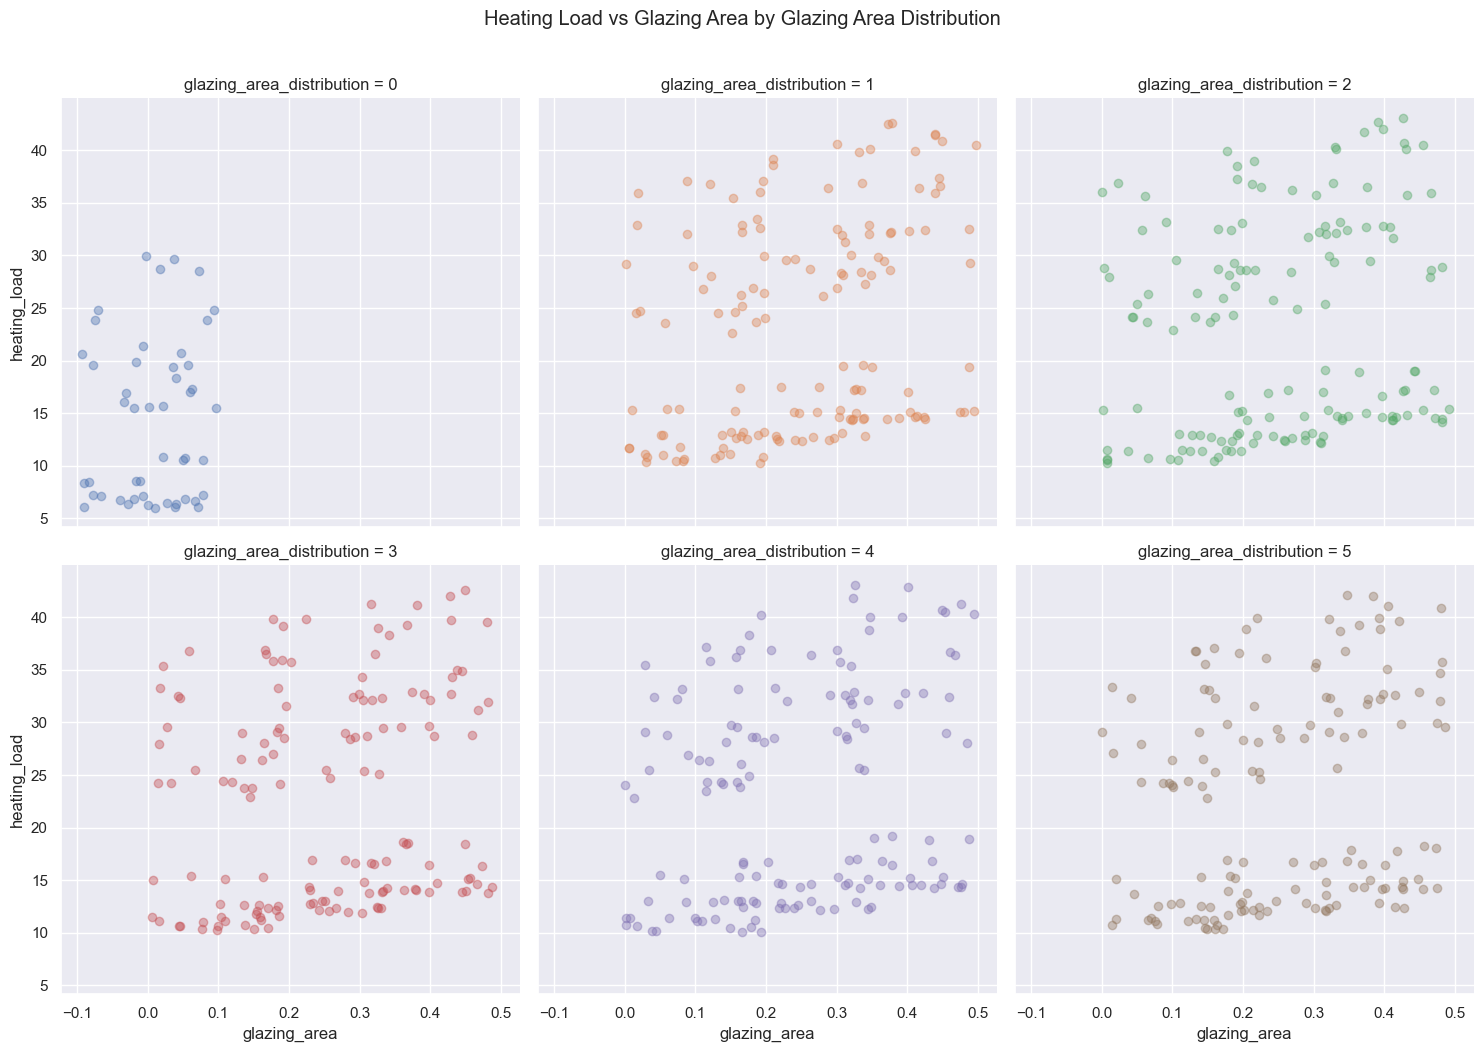

In [12]:
# check whether the glazing_area_distribution has an impact on the relationship between glazing_are and heating_load
lmplot = sns.lmplot(data=data, x='glazing_area', y='heating_load', hue='glazing_area_distribution', 
           fit_reg=False, scatter_kws={'alpha':0.4}, x_jitter=0.1, y_jitter=0.1,
           col='glazing_area_distribution', col_wrap=3)
lmplot.fig.suptitle('Heating Load vs Glazing Area by Glazing Area Distribution', y=1.05)
plt.show()

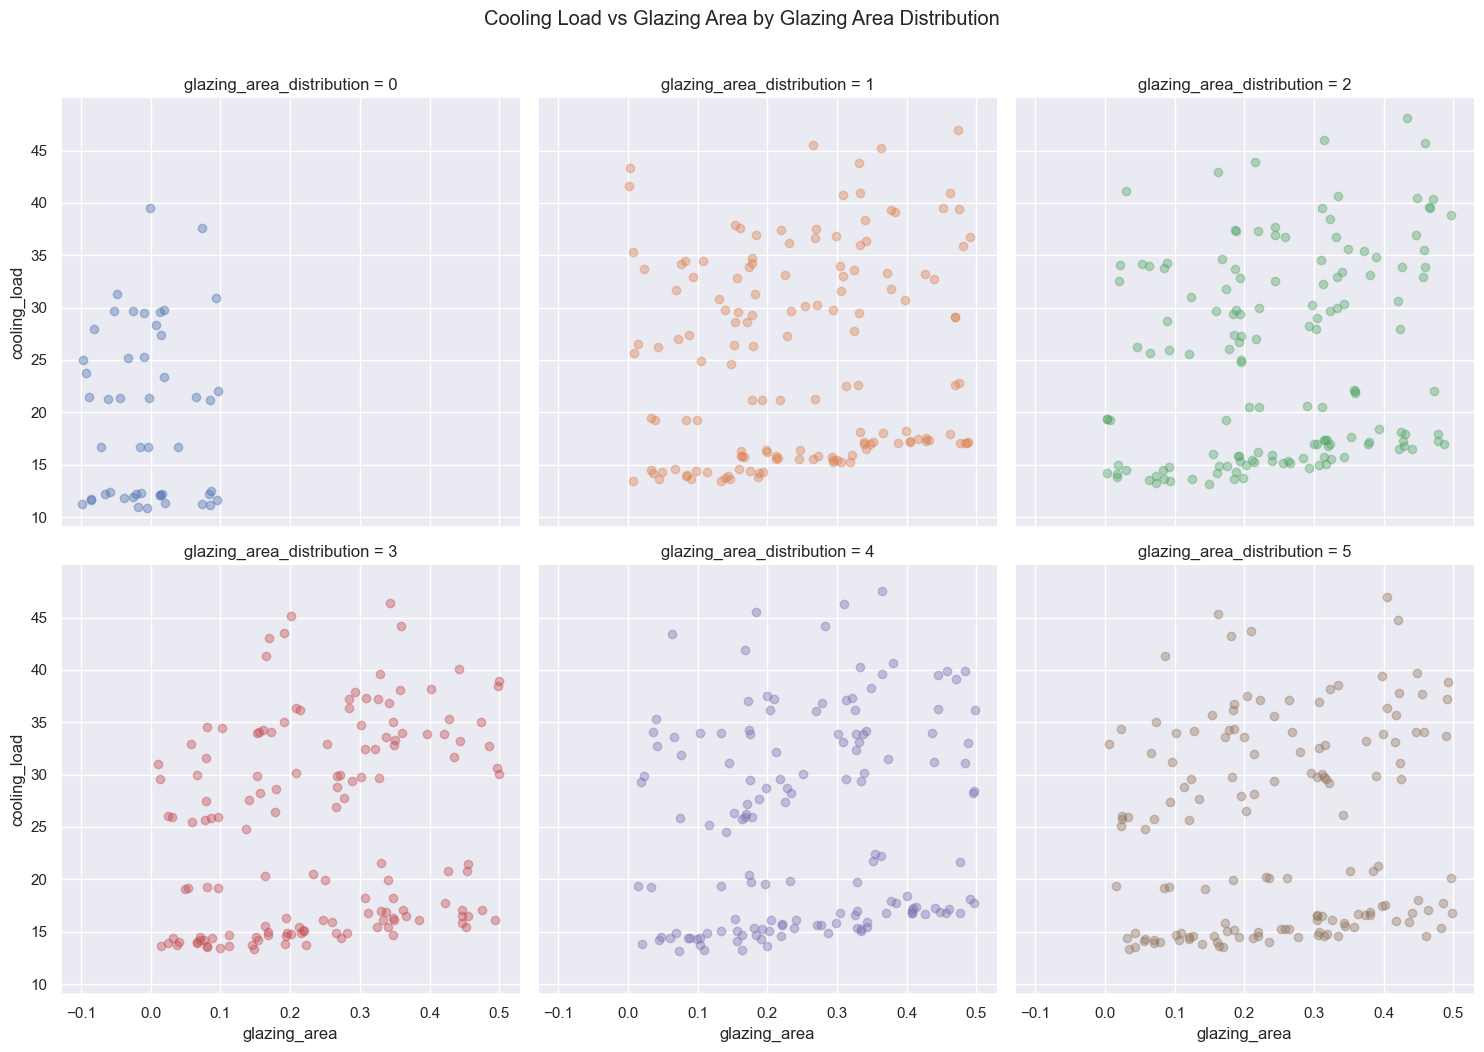

In [13]:
# check whether the glazing_area_distribution has an impact on the relationship between glazing_are and cooling_load
lmplot = sns.lmplot(data=data, x='glazing_area', y='cooling_load', hue='glazing_area_distribution', 
           fit_reg=False, scatter_kws={'alpha':0.4}, x_jitter=0.1, y_jitter=0.1,
           col='glazing_area_distribution', col_wrap=3)
lmplot.fig.suptitle('Cooling Load vs Glazing Area by Glazing Area Distribution', y=1.05)
plt.show()

* Except type 0, different types of `glazing_area_distribution` scatter similarly.

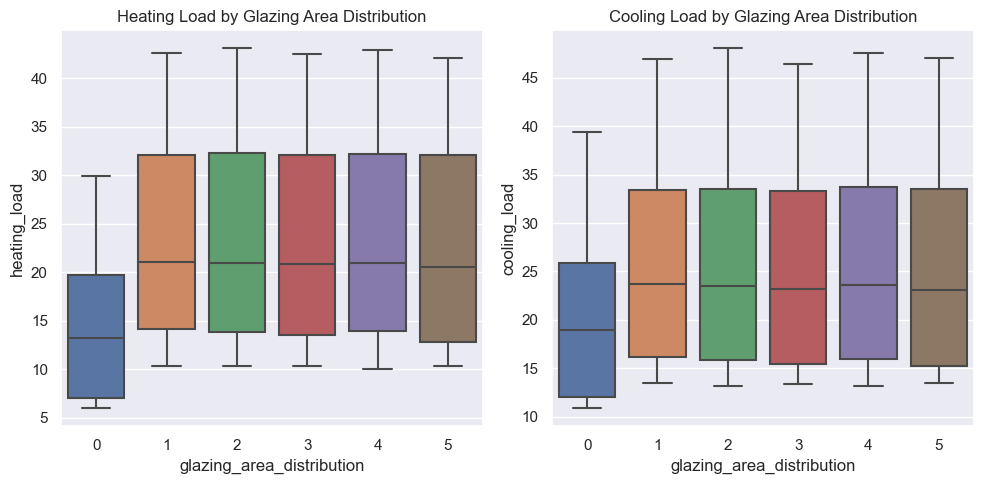

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether glazing_area_distribution has an impact on heating_load
sns.boxplot(data=data, x='glazing_area_distribution', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Glazing Area Distribution')

# check whether glazing_area_distribution has an impact on cooling_load
sns.boxplot(data=data, x='glazing_area_distribution', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing Area Distribution')

plt.tight_layout()
plt.show()

* Only type 0 of `glazing_area_distribution` has an significant impact on the heating and cooling load, so I can use binarization to reduce dimensionality.

In [15]:
# change glazing_area_distribution to binary variable to reduce dimensionality
data['glazing_area_distribution'] = data['glazing_area_distribution'].replace({0:0, 1:1, 2:1, 3:1, 4:1, 5:1})
data['glazing_area_distribution'] = data['glazing_area_distribution'].astype('category')
data['glazing_area_distribution'].value_counts()

glazing_area_distribution
1    720
0     48
Name: count, dtype: int64

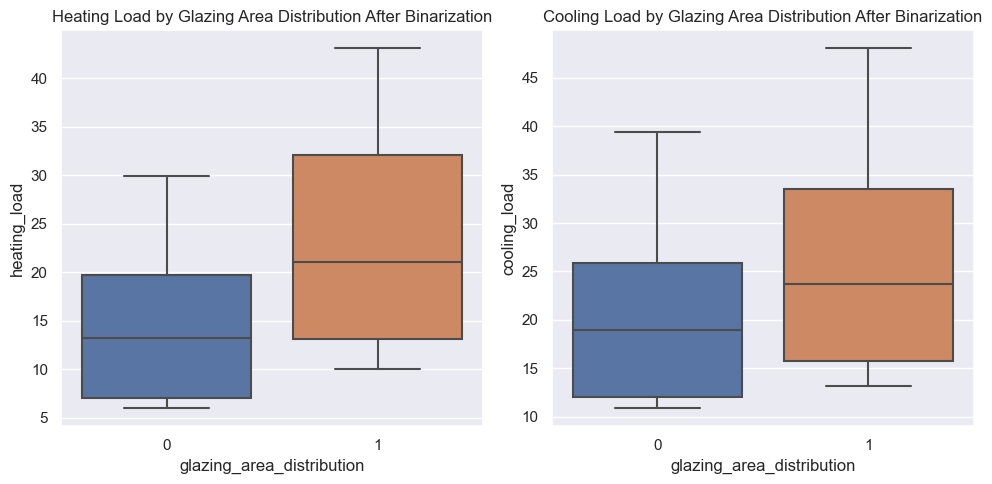

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether glazing_area_distribution has an impact on heating_load
sns.boxplot(data=data, x='glazing_area_distribution', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Glazing Area Distribution After Binarization')

# check whether glazing_area_distribution has an impact on cooling_load
sns.boxplot(data=data, x='glazing_area_distribution', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing Area Distribution After Binarization')

plt.tight_layout()
plt.show()

In [17]:
# splitting the dataset into features and targets
y1 = data['heating_load']
y2 = data['cooling_load']
X = data.drop(['heating_load','cooling_load'], axis = 1)

# check features
features = list(X.columns)
features

['relative_compactness',
 'wall_area',
 'roof_area',
 'overall_height',
 'glazing_area',
 'glazing_area_distribution']

Next, I will try the classic OLS linear regression model and see how it performs.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed = 1

In [19]:
# split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state=seed)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state=seed)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# train the model and make predictions for heating_load
lr_heating = LinearRegression()
y1_pred = lr_heating.fit(X_train, y1_train).predict(X_test)

# train the model and make predictions for cooling_load
lr_cooling = LinearRegression()
y2_pred = lr_cooling.fit(X_train, y2_train).predict(X_test)

In [21]:
# check the model performance

# calculate the adjusted R2 score
adjuted_r2_heating = 1 - (1-r2_score(y1_test, y1_pred))*(len(y1_test)-1)/(len(y1_test)-X_test.shape[1]-1)
adjuted_r2_cooling = 1 - (1-r2_score(y2_test, y2_pred))*(len(y2_test)-1)/(len(y2_test)-X_test.shape[1]-1)
print('Heating load model adjusted R2 score: \n', adjuted_r2_heating.round(4))
print('Cooling load model adjusted R2 score: \n', adjuted_r2_cooling.round(4))
print('')

# calculate the MSE
print('MSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred).round(4))
print('MSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred).round(4))
print('')

# calculate the RMSE
print('RMSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred, squared=False).round(4))
print('RMSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred, squared=False).round(4))
print('')

# calculate the MAE
print('MAE of predicting heating load: \n', mean_absolute_error(y1_test, y1_pred).round(4))
print('MAE of predicting cooling load: \n', mean_absolute_error(y2_test, y2_pred).round(4))

Heating load model adjusted R2 score: 
 0.9003
Cooling load model adjusted R2 score: 
 0.8623

MSE of predicting heating load: 
 9.8933
MSE of predicting cooling load: 
 12.2353

RMSE of predicting heating load: 
 3.1454
RMSE of predicting cooling load: 
 3.4979

MAE of predicting heating load: 
 2.3002
MAE of predicting cooling load: 
 2.4978


* The adjusted R squared of the heating load model and the cooling load model are 0.9003 and 0.8623 respectively, indicating that the model can explain 90.03% and 86.23% of the differences in the energy efficiency of different buildings, respectively. The models show good fits to the data and could be useful in predicting the energy efficiency based on the 6 metrics of a residential building.  

* The MAE(Mean Absolute Error) of the fitted models are 2.3002 and 2.4978 respectively, meaning that the predicted values of energy efficiency would deviate from the actual values by an average of 2.3002 and 2.4978 units respectively. This metric shows the expected error when making predictions using the fitted models and the 6 features, and allows us to determine if the error is acceptable in the use case.  

* The MSE(Mean Squared Error) is 9.8933 and 12.2353 respectively. This metric is larger than the MAE because it penalizes large errors by squaring each error. It could be useful when comparing the performance of different models because MSE can show the instability of the prediction performance of different models.  

* The RMSE(Root Mean Squared Error) is 3.1454 and 3.4979 respectively. This metric takes the square root of the mean squared error to make the unit of the RMSE the same as the unit of the target variable, which is energy efficiency in this case, so it could be better interpreted in the context of the use case and by people without statistical background. It's still larger than MAE because it penalizes large errors.

After evaluating the performance of the model, I will check the feature importance to see which features of a residential building contribute most to the energy efficiency.

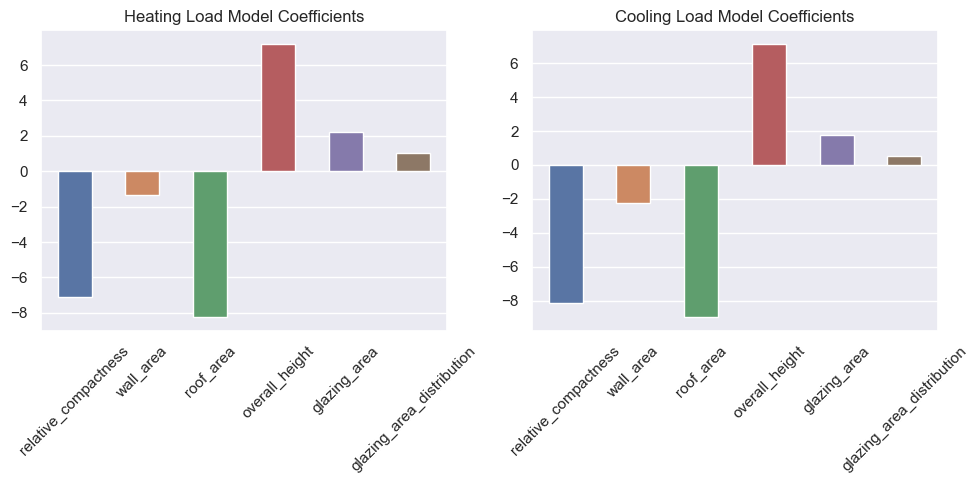

In [23]:
# plot the coefficients of features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=features, y=lr_heating.coef_, width=0.5, ax=axes[0])
axes[0].set_title('Heating Load Model Coefficients')
axes[0].set_xticklabels(labels=features, rotation=45)

sns.barplot(x=features, y=lr_cooling.coef_, width=0.5, ax=axes[1])
axes[1].set_title('Cooling Load Model Coefficients')
axes[1].set_xticklabels(labels=features, rotation=45)

plt.tight_layout()
plt.show()

* The `relative_compactness` and `roof_area` have significant negative impact on both heating load and cooling load.
* The `overall_height` has significant positive impact on both heating load and cooling load.
* These three features have the greatest impact on energy efficiency.

In [22]:
# check the coefficients and intercepts of the models
print('Heating load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', lr_heating.coef_[i])
print('Heating load model intercept: \n', lr_heating.intercept_)
print('')

print('Cooling load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', lr_cooling.coef_[i])
print('Cooling load model intercept: \n', lr_cooling.intercept_)

Heating load model coefficients:
relative_compactness : -7.095845873047645
wall_area : -1.3159700922227593
roof_area : -8.234793485188415
overall_height : 7.18326659421772
glazing_area : 2.241674115275165
glazing_area_distribution : 1.020804688621697
Heating load model intercept: 
 21.91440595903166

Cooling load model coefficients:
relative_compactness : -8.156114906057038
wall_area : -2.227514344870592
roof_area : -8.970425365072838
overall_height : 7.131722242939717
glazing_area : 1.7540712278958694
glazing_area_distribution : 0.5130584986980209
Cooling load model intercept: 
 24.170484171322162


* The pairplot above shows that there are not much linear relationship between the features and the target variables, and the variables are not normally distributed, so a linear regression model may not be the best choice for this dataset.  
* Next, I will try different types of models to see if there is a better model for predicting energy efficiency. 
* Since the dataset only contains 768 samples, it's possible to use Leave-One-Out (LOO) as the cross-validation method.

In [24]:
from sklearn.linear_model import Ridge, Lasso   
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import LeaveOneOut

In [25]:
# define various models and make a list
models = [LinearRegression(), Ridge(random_state=seed), Lasso(random_state=seed), 
          DecisionTreeRegressor(random_state=seed), RandomForestRegressor(random_state=seed), 
          GradientBoostingRegressor(random_state=seed), AdaBoostRegressor(random_state=seed), 
          KNeighborsRegressor(), SVR()]

In [26]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# define a function using leave-one-out cross validation to evaluate the models
def loo_results(model, X_scaled, y):
    
    loo = LeaveOneOut()
    test_array = np.array([])
    pred_array = np.array([])
    
    for train_index, test_index in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_pred = model.fit(X_train, y_train).predict(X_test)
        test_array = np.append(test_array, y_test)
        pred_array = np.append(pred_array, y_pred)
    
    r2 = r2_score(test_array, pred_array)
    adjusted_r2 = (1 - (1-r2)*(len(test_array)-1)/(len(test_array)-X_scaled.shape[1]-1))
    mse = mean_squared_error(test_array, pred_array)
    rmse = mean_squared_error(test_array, pred_array, squared=False)
    mae = mean_absolute_error(test_array, pred_array)
    
    return adjusted_r2, mse, rmse, mae

In [28]:
# create ataframes to store the results
df_loo_heating = pd.DataFrame(columns=['Model_Heating', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])
df_loo_cooling = pd.DataFrame(columns=['Model_Cooling', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])

for model in models:
    adjuted_r2_heating, mse_heating, rmse_heating, mae_heating = loo_results(model, X_scaled, y1)
    df_loo_heating = pd.concat([df_loo_heating, 
                                pd.DataFrame([[model.__class__.__name__, 
                                               adjuted_r2_heating, mse_heating, mae_heating, rmse_heating]],
                                             columns=['Model_Heating', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])],
                                axis=0)
    adjuted_r2_cooling, mse_cooling, rmse_cooling, mae_cooling = loo_results(model, X_scaled, y2)
    df_loo_cooling = pd.concat([df_loo_cooling,
                                pd.DataFrame([[model.__class__.__name__,
                                               adjuted_r2_cooling, mse_cooling, mae_cooling, rmse_cooling]],
                                             columns=['Model_Cooling', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])],
                                axis=0)
    
# sort the results by adjusted R2
df_loo_heating = df_loo_heating.sort_values(by='LOO_Adj_R2', ascending=False).reset_index(drop=True)
df_loo_cooling = df_loo_cooling.sort_values(by='LOO_Adj_R2', ascending=False).reset_index(drop=True)

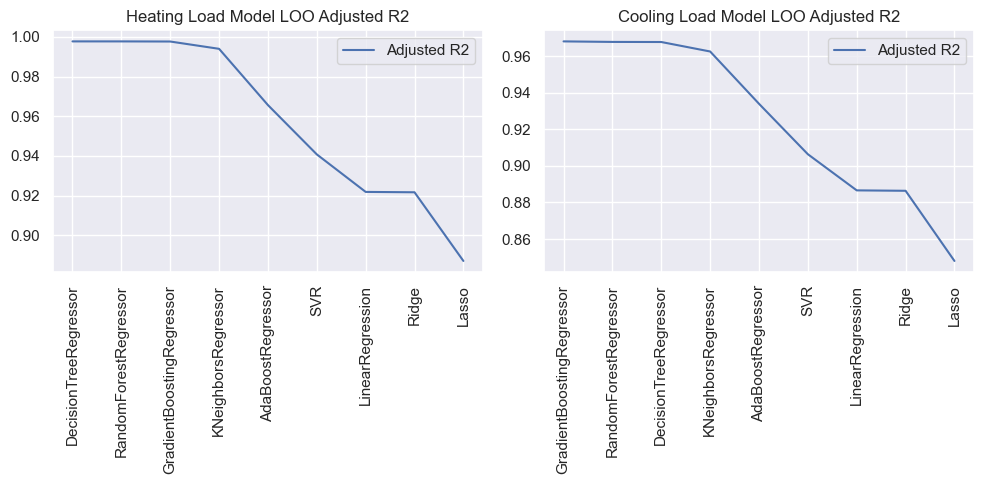

In [30]:
# plot the results of cross validation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_Adj_R2', label='Adjusted R2', ax=ax[0])
ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model LOO Adjusted R2')

sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_Adj_R2', label='Adjusted R2', ax=ax[1])
ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Cooling Load Model LOO Adjusted R2')

plt.tight_layout()
plt.show()

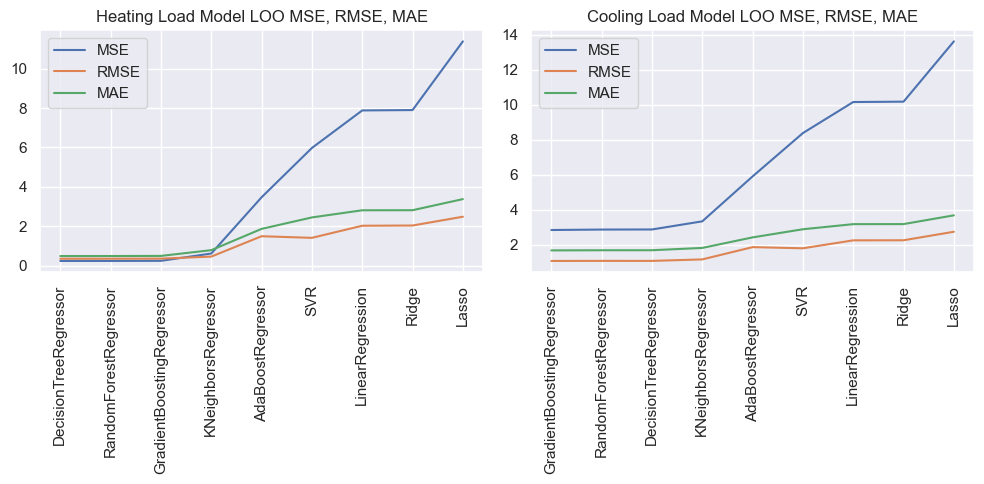

In [31]:
# plot the results of cross validation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_MSE', label='MSE', ax=ax[0])
sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_RMSE', label='RMSE', ax=ax[0])
sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_MAE', label='MAE', ax=ax[0])
ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model LOO MSE, RMSE, MAE')

sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_MSE', label='MSE', ax=ax[1])
sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_RMSE', label='RMSE', ax=ax[1])
sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_MAE', label='MAE', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)
ax[1].set_title('Cooling Load Model LOO MSE, RMSE, MAE')

plt.tight_layout()
plt.show()

In [55]:
# check the results
print(df_loo_heating.round(4))
print('')
print(df_loo_cooling.round(4))

               Model_Heating  LOO_Adj_R2  LOO_MSE  LOO_RMSE  LOO_MAE
0      DecisionTreeRegressor      0.9977   0.2330    0.3457   0.4827
1      RandomForestRegressor      0.9977   0.2337    0.3470   0.4834
2  GradientBoostingRegressor      0.9976   0.2395    0.3514   0.4894
3        KNeighborsRegressor      0.9939   0.6106    0.4544   0.7814
4          AdaBoostRegressor      0.9656   3.4682    1.4889   1.8623
5                        SVR      0.9408   5.9727    1.4068   2.4439
6           LinearRegression      0.9219   7.8788    2.0220   2.8069
7                      Ridge      0.9217   7.8973    2.0330   2.8102
8                      Lasso      0.8871  11.3856    2.4801   3.3743

               Model_Cooling  LOO_Adj_R2  LOO_MSE  LOO_RMSE  LOO_MAE
0  GradientBoostingRegressor      0.9682   2.8537    1.0858   1.6893
1      RandomForestRegressor      0.9679   2.8797    1.0904   1.6970
2      DecisionTreeRegressor      0.9678   2.8842    1.0897   1.6983
3        KNeighborsRegressor     

* Comparing to the linear regression model, Gradient Boosting, Decision Tree, Random Forest and K-Nearest Neighbors have significant improvements in the cross-validation model performance.
* Next, I will test these 4 models to see which model performs best on an unseen dataset.

In [32]:
# split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=seed)

# scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# define a function to evaluate the models using test data
def model_test(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # calculate the evaluation metrics
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = (1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    return adjusted_r2, mse, rmse, mae

In [34]:
# define the models to be tested
models_test = [ DecisionTreeRegressor(random_state=seed), RandomForestRegressor(random_state=seed),
                GradientBoostingRegressor(random_state=seed), KNeighborsRegressor()]

In [35]:
# create dataframes to store the evaluation metrics of models
df_heating_test = pd.DataFrame(columns=['Model_Heating', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])
for model in models_test:
    adjusted_r2, mse, rmse, mae = model_test(model, X_train, y1_train, X_test, y1_test)
    df_heating_test = pd.concat([df_heating_test, 
                                 pd.DataFrame([[model.__class__.__name__, adjusted_r2, mse, rmse, mae]], 
                                              columns=['Model_Heating', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])], 
                                axis=0)
df_heating_test = df_heating_test.sort_values(by='Test_Adj_R2', ascending=False).reset_index(drop=True)


df_cooling_test = pd.DataFrame(columns=['Model_Cooling', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])
for model in models_test:
    adjusted_r2, mse, rmse, mae = model_test(model, X_train, y2_train, X_test, y2_test)
    df_cooling_test = pd.concat([df_cooling_test, 
                                 pd.DataFrame([[model.__class__.__name__, adjusted_r2, mse, rmse, mae]], 
                                              columns=['Model_Cooling', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])], 
                                axis=0)
df_cooling_test = df_cooling_test.sort_values(by='Test_Adj_R2', ascending=False).reset_index(drop=True)

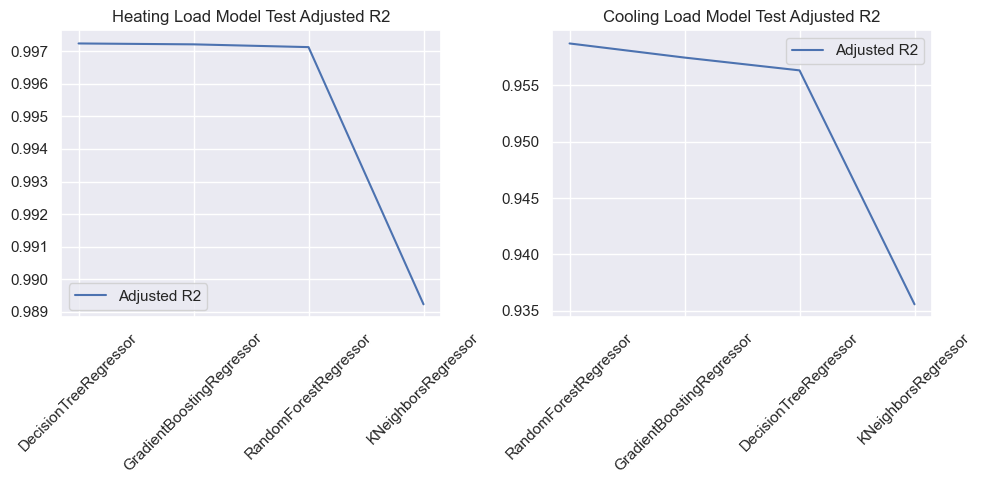

In [37]:
# plot the results of test data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_Adj_R2', label='Adjusted R2', ax=ax[0])
ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model Test Adjusted R2')

sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_Adj_R2', label='Adjusted R2', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)
ax[1].set_title('Cooling Load Model Test Adjusted R2')

plt.tight_layout()
plt.show()

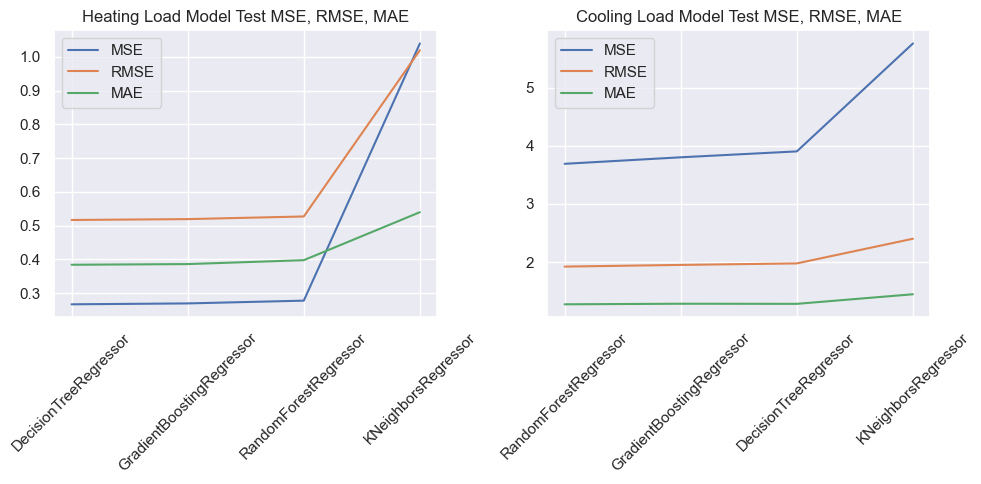

In [38]:
# plot the results of test data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_MSE', label='MSE', ax=ax[0])
sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_RMSE', label='RMSE', ax=ax[0])
sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_MAE', label='MAE', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
ax[0].set_title('Heating Load Model Test MSE, RMSE, MAE')

sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_MSE', label='MSE', ax=ax[1])
sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_RMSE', label='RMSE', ax=ax[1])
sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_MAE', label='MAE', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)
ax[1].set_title('Cooling Load Model Test MSE, RMSE, MAE')

plt.tight_layout()
plt.show()

In [54]:
# check the results of test data
print(f'Heating load model test results: \n{df_heating_test.round(4)}')
print(' ')
print(f'Cooling load model test results: \n{df_cooling_test.round(4)}')

Heating load model test results: 
               Model_Heating  Test_Adj_R2  Test_MSE  Test_RMSE  Test_MAE
0      DecisionTreeRegressor       0.9972    0.2669     0.5166    0.3840
1  GradientBoostingRegressor       0.9972    0.2695     0.5192    0.3860
2      RandomForestRegressor       0.9971    0.2777     0.5270    0.3976
3        KNeighborsRegressor       0.9892    1.0393     1.0195    0.5397
 
Cooling load model test results: 
               Model_Cooling  Test_Adj_R2  Test_MSE  Test_RMSE  Test_MAE
0      RandomForestRegressor       0.9587    3.6906     1.9211    1.2718
1  GradientBoostingRegressor       0.9575    3.8028     1.9501    1.2817
2      DecisionTreeRegressor       0.9563    3.9045     1.9760    1.2797
3        KNeighborsRegressor       0.9356    5.7628     2.4006    1.4447


* On the test data set, Gradient Boosting, Decision Tree and Random Forest still have excellent performance, while K-Nearest Neighbors has worse performance compared to the cross-validation result, indicating a potential overfitting problem of the KNN model. 
* In conclusion, the tree-based models outperform the linear models on this dataset due to the non-linear relationships between the features and the target variables.
* When predicting the heating load, the expected error of the Decision Tree model is 0.3840 unit on average, and when predicting the cooling load, the expected error of the Random Forest model is 1.2718 unit on average.

Next, I will extract the feature importance from the tree models and to compare it to that of the linear regression model.

In [39]:
# fit the models using the whole dataset
dt_heating = DecisionTreeRegressor(random_state=seed).fit(X, y1)
rf_cooling = RandomForestRegressor(random_state=seed).fit(X, y2)

# extract the feature importance
heating_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_heating.feature_importances_})
cooling_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_cooling.feature_importances_})

# sort the feature importance in descending order
heating_feature_importance = heating_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)
cooling_feature_importance = cooling_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

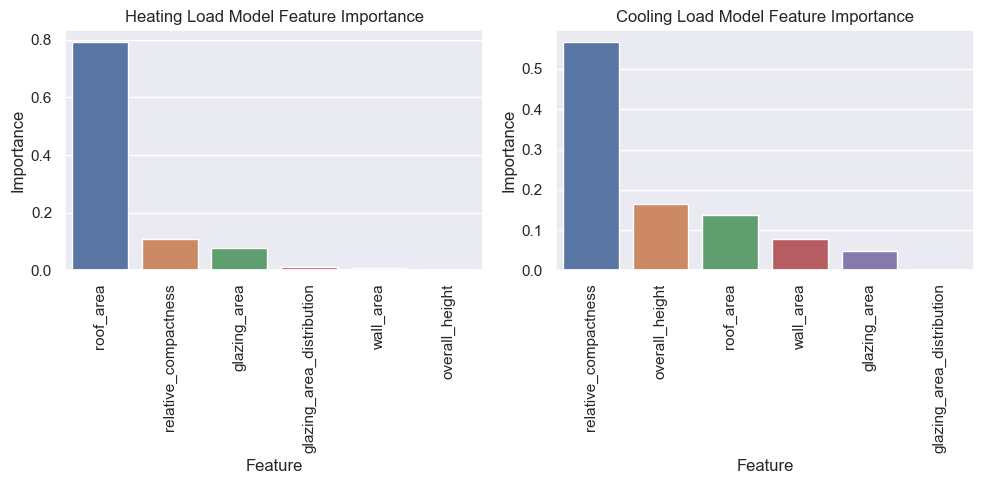

In [41]:
# plot the feature importance
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(data=heating_feature_importance, x='Feature', y='Importance', ax=ax[0])
ax[0].set_xticklabels(labels=heating_feature_importance['Feature'], rotation=90)
ax[0].set_title('Heating Load Model Feature Importance')

sns.barplot(data=cooling_feature_importance, x='Feature', y='Importance', ax=ax[1])
ax[1].set_xticklabels(labels=cooling_feature_importance['Feature'], rotation=90)
ax[1].set_title('Cooling Load Model Feature Importance')

plt.tight_layout()
plt.show()

In [40]:
# check the feature importance
print(f'Heating load model feature importance: \n{heating_feature_importance}')
print('')
print(f'Cooling load model feature importance: \n{cooling_feature_importance}')

Heating load model feature importance: 
                     Feature  Importance
0                  roof_area    0.792761
1       relative_compactness    0.109028
2               glazing_area    0.078225
3  glazing_area_distribution    0.010173
4                  wall_area    0.009812
5             overall_height    0.000000

Cooling load model feature importance: 
                     Feature  Importance
0       relative_compactness    0.567212
1             overall_height    0.164438
2                  roof_area    0.137544
3                  wall_area    0.078453
4               glazing_area    0.048232
5  glazing_area_distribution    0.004120


* For the heating load of a residential building, roof area is the most influential factor.
* For the cooling load of a residential building, relative_compactness is the most influential factor.